In [8]:
import numpy as np 
import matplotlib.pyplot as plt 


In [19]:
def metodoEuler(derivada, paso, objetivo, origen, valorInicial):
    #Asumiendo que origen < objetivo
    valores = [valorInicial]
    puntos = [origen]
    puntoActual = origen
    valorActual = valorInicial
    while(puntoActual < objetivo):
        valorActual = valorActual + paso * derivada(puntoActual,valorActual)
        puntoActual = puntoActual + paso
        puntos.append(puntoActual)
        valores.append(valorActual)
    return puntos, valores

    
    


/tmp/ipykernel_34381/1705567591.py:6: RuntimeWarning: overflow encountered in exp
  e_values = np.exp(lda * x_values)


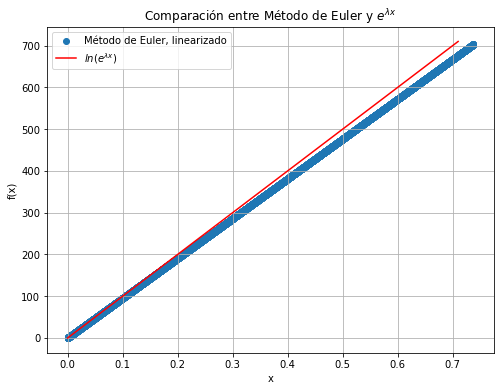

In [34]:
lda = 1000

puntos, valores = metodoEuler(lambda t, f: lda*f, 0.0001, 100, 0, 1)

x_values = np.array(puntos)
e_values = np.exp(lda * x_values)

# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.scatter(puntos, np.log(valores), label='Método de Euler, linearizado')
plt.plot(x_values, np.log(e_values), label=r'$ln(e^{\lambda x})$', color='red')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Comparación entre Método de Euler y $e^{\lambda x}$')
plt.legend()
plt.grid(True)
plt.show()


[1,
 0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6,
 0.7,
 0.7999999999999999,
 0.8999999999999999,
 0.9999999999999999,
 1.0999999999999999,
 1.2,
 1.3,
 1.4000000000000001,
 1.5000000000000002,
 1.6000000000000003,
 1.7000000000000004,
 1.8000000000000005,
 1.9000000000000006,
 2.0000000000000004,
 2.1000000000000005,
 2.2000000000000006,
 2.3000000000000007,
 2.400000000000001,
 2.500000000000001,
 2.600000000000001,
 2.700000000000001,
 2.800000000000001,
 2.9000000000000012,
 3.0000000000000013,
 3.1000000000000014,
 3.2000000000000015,
 3.3000000000000016,
 3.4000000000000017,
 3.5000000000000018,
 3.600000000000002,
 3.700000000000002,
 3.800000000000002,
 3.900000000000002,
 4.000000000000002,
 4.100000000000001,
 4.200000000000001,
 4.300000000000001,
 4.4,
 4.5,
 4.6,
 4.699999999999999,
 4.799999999999999,
 4.899999999999999,
 4.999999999999998,
 5.099999999999998]